## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  11.950073   570.749914  0.396179   1.630568  1.568466
1   0.304533   378.040886  0.413183   7.641877  1.652575
2  45.179018  1671.759849  0.697895   5.767985  1.483588
3  71.421845  1524.954421  0.084929  10.165884  1.050822
4  92.801743   964.062153  0.983802   1.158000  1.654768


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0374049	total: 57.8ms	remaining: 57.8s
1:	learn: 1.0281208	total: 58.4ms	remaining: 29.1s
2:	learn: 1.0165234	total: 58.9ms	remaining: 19.6s
3:	learn: 1.0059333	total: 59.2ms	remaining: 14.7s
4:	learn: 0.9956446	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9856150	total: 60.3ms	remaining: 9.98s
6:	learn: 0.9756076	total: 60.8ms	remaining: 8.62s
7:	learn: 0.9657484	total: 61.3ms	remaining: 7.6s
8:	learn: 0.9554432	total: 61.7ms	remaining: 6.79s
9:	learn: 0.9441576	total: 62.3ms	remaining: 6.16s
10:	learn: 0.9354154	total: 62.8ms	remaining: 5.65s
11:	learn: 0.9249009	total: 63.3ms	remaining: 5.21s
12:	learn: 0.9164241	total: 63.7ms	remaining: 4.84s
13:	learn: 0.9073440	total: 64.3ms	remaining: 4.53s
14:	learn: 0.8981709	total: 64.7ms	remaining: 4.25s
15:	learn: 0.8886775	total: 65.1ms	remaining: 4s
16:	learn: 0.8776964	total: 65.5ms	remaining: 3.79s
17:	learn: 0.8686407	total: 65.9ms	remaining: 3.59s
18:	learn: 0.8612686	total: 66.2ms	remaining: 3.

112:	learn: 0.3812046	total: 107ms	remaining: 842ms
113:	learn: 0.3791274	total: 108ms	remaining: 836ms
114:	learn: 0.3770863	total: 108ms	remaining: 832ms
115:	learn: 0.3749420	total: 109ms	remaining: 827ms
116:	learn: 0.3725212	total: 109ms	remaining: 822ms
117:	learn: 0.3698330	total: 109ms	remaining: 817ms
118:	learn: 0.3678565	total: 110ms	remaining: 813ms
119:	learn: 0.3657590	total: 110ms	remaining: 809ms
120:	learn: 0.3631081	total: 111ms	remaining: 806ms
121:	learn: 0.3606669	total: 111ms	remaining: 801ms
122:	learn: 0.3579478	total: 112ms	remaining: 798ms
123:	learn: 0.3555982	total: 112ms	remaining: 793ms
124:	learn: 0.3534100	total: 113ms	remaining: 789ms
125:	learn: 0.3511066	total: 113ms	remaining: 785ms
126:	learn: 0.3490333	total: 114ms	remaining: 781ms
127:	learn: 0.3470553	total: 114ms	remaining: 777ms
128:	learn: 0.3451573	total: 115ms	remaining: 773ms
129:	learn: 0.3431742	total: 115ms	remaining: 770ms
130:	learn: 0.3407341	total: 116ms	remaining: 766ms
131:	learn: 

286:	learn: 0.1620948	total: 186ms	remaining: 461ms
287:	learn: 0.1617264	total: 186ms	remaining: 460ms
288:	learn: 0.1613711	total: 186ms	remaining: 458ms
289:	learn: 0.1609857	total: 187ms	remaining: 457ms
290:	learn: 0.1605926	total: 187ms	remaining: 456ms
291:	learn: 0.1602630	total: 188ms	remaining: 455ms
292:	learn: 0.1598807	total: 188ms	remaining: 453ms
293:	learn: 0.1588819	total: 188ms	remaining: 452ms
294:	learn: 0.1580989	total: 189ms	remaining: 451ms
295:	learn: 0.1577706	total: 189ms	remaining: 450ms
296:	learn: 0.1569249	total: 190ms	remaining: 449ms
297:	learn: 0.1559696	total: 190ms	remaining: 447ms
298:	learn: 0.1551591	total: 190ms	remaining: 446ms
299:	learn: 0.1547466	total: 191ms	remaining: 445ms
300:	learn: 0.1544355	total: 191ms	remaining: 444ms
301:	learn: 0.1541194	total: 192ms	remaining: 443ms
302:	learn: 0.1535496	total: 192ms	remaining: 442ms
303:	learn: 0.1532430	total: 192ms	remaining: 441ms
304:	learn: 0.1529457	total: 193ms	remaining: 439ms
305:	learn: 

517:	learn: 0.0811257	total: 289ms	remaining: 269ms
518:	learn: 0.0809425	total: 290ms	remaining: 268ms
519:	learn: 0.0807136	total: 290ms	remaining: 268ms
520:	learn: 0.0806246	total: 290ms	remaining: 267ms
521:	learn: 0.0804491	total: 291ms	remaining: 266ms
522:	learn: 0.0802242	total: 291ms	remaining: 265ms
523:	learn: 0.0799368	total: 291ms	remaining: 265ms
524:	learn: 0.0797676	total: 292ms	remaining: 264ms
525:	learn: 0.0794656	total: 292ms	remaining: 263ms
526:	learn: 0.0793878	total: 293ms	remaining: 263ms
527:	learn: 0.0791782	total: 293ms	remaining: 262ms
528:	learn: 0.0790982	total: 294ms	remaining: 261ms
529:	learn: 0.0788185	total: 294ms	remaining: 261ms
530:	learn: 0.0785258	total: 295ms	remaining: 260ms
531:	learn: 0.0784468	total: 296ms	remaining: 260ms
532:	learn: 0.0782365	total: 296ms	remaining: 259ms
533:	learn: 0.0779505	total: 297ms	remaining: 259ms
534:	learn: 0.0778737	total: 297ms	remaining: 258ms
535:	learn: 0.0777978	total: 297ms	remaining: 257ms
536:	learn: 

699:	learn: 0.0468049	total: 366ms	remaining: 157ms
700:	learn: 0.0465529	total: 367ms	remaining: 157ms
701:	learn: 0.0464094	total: 368ms	remaining: 156ms
702:	learn: 0.0462251	total: 368ms	remaining: 155ms
703:	learn: 0.0461379	total: 368ms	remaining: 155ms
704:	learn: 0.0458937	total: 369ms	remaining: 154ms
705:	learn: 0.0457507	total: 369ms	remaining: 154ms
706:	learn: 0.0456547	total: 370ms	remaining: 153ms
707:	learn: 0.0455606	total: 370ms	remaining: 153ms
708:	learn: 0.0453708	total: 371ms	remaining: 152ms
709:	learn: 0.0452787	total: 371ms	remaining: 152ms
710:	learn: 0.0450924	total: 372ms	remaining: 151ms
711:	learn: 0.0450553	total: 372ms	remaining: 150ms
712:	learn: 0.0448624	total: 372ms	remaining: 150ms
713:	learn: 0.0447230	total: 373ms	remaining: 149ms
714:	learn: 0.0445415	total: 373ms	remaining: 149ms
715:	learn: 0.0444053	total: 374ms	remaining: 148ms
716:	learn: 0.0443687	total: 374ms	remaining: 148ms
717:	learn: 0.0441914	total: 375ms	remaining: 147ms
718:	learn: 

944:	learn: 0.0267788	total: 470ms	remaining: 27.4ms
945:	learn: 0.0267545	total: 470ms	remaining: 26.9ms
946:	learn: 0.0267412	total: 471ms	remaining: 26.3ms
947:	learn: 0.0266312	total: 471ms	remaining: 25.8ms
948:	learn: 0.0266181	total: 472ms	remaining: 25.3ms
949:	learn: 0.0265941	total: 472ms	remaining: 24.8ms
950:	learn: 0.0265292	total: 473ms	remaining: 24.3ms
951:	learn: 0.0265161	total: 473ms	remaining: 23.8ms
952:	learn: 0.0264924	total: 473ms	remaining: 23.3ms
953:	learn: 0.0264414	total: 474ms	remaining: 22.8ms
954:	learn: 0.0263781	total: 474ms	remaining: 22.3ms
955:	learn: 0.0263034	total: 474ms	remaining: 21.8ms
956:	learn: 0.0262801	total: 475ms	remaining: 21.3ms
957:	learn: 0.0262671	total: 475ms	remaining: 20.8ms
958:	learn: 0.0262009	total: 476ms	remaining: 20.3ms
959:	learn: 0.0261509	total: 476ms	remaining: 19.8ms
960:	learn: 0.0260932	total: 476ms	remaining: 19.3ms
961:	learn: 0.0260749	total: 477ms	remaining: 18.8ms
962:	learn: 0.0260112	total: 477ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

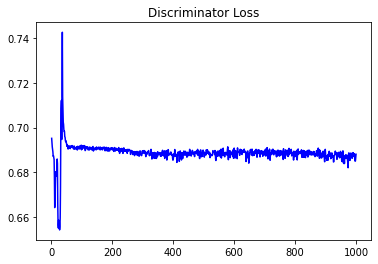

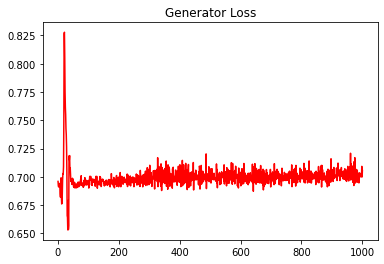

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.29752089492361566


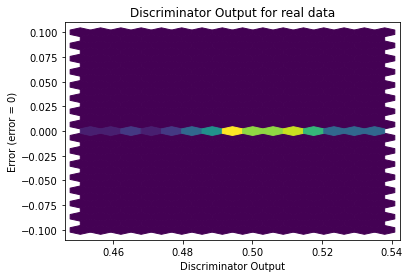

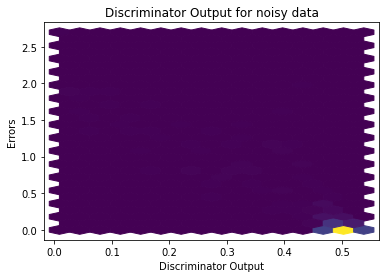

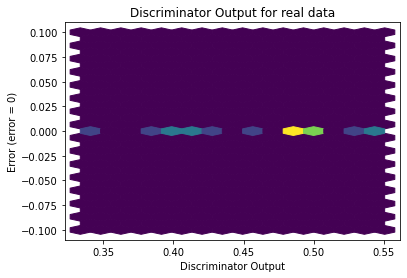

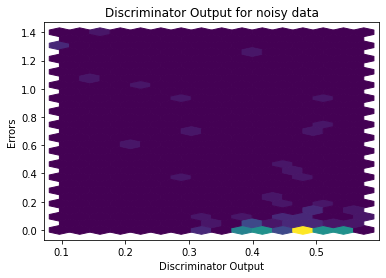

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


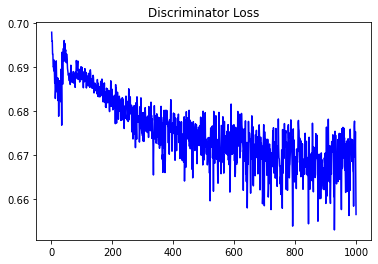

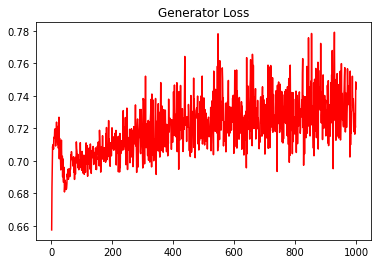

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3179603173436064


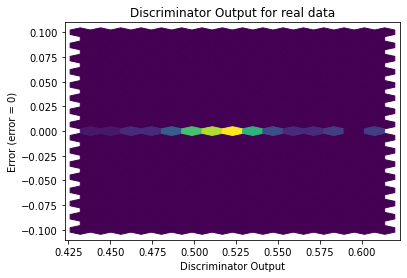

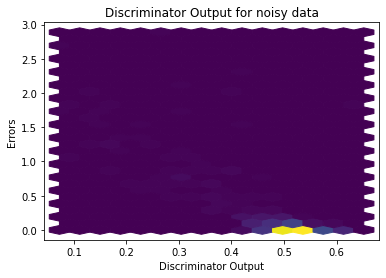

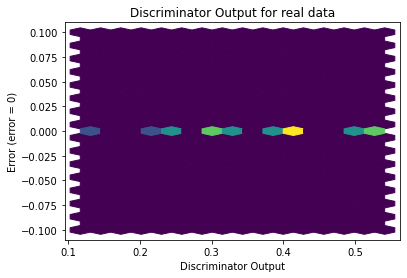

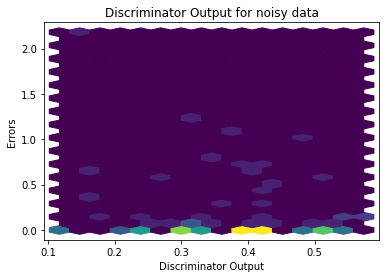

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1944]], requires_grad=True)
